# OSMNX learning
Maybe an easier method than using Overpy because it natively creates geodataframes

In [164]:
import pandas as pd
import requests
import json
import geopandas as gpd
import contextily as cx
from copy import deepcopy
import geopy.distance
from shapely.geometry import MultiPolygon, Polygon, Point, LineString
import osmnx as ox
import pyproj

import pickle
import webbrowser

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [165]:
# Load nation lakes coords   
with open("nation_lakes.json") as f:
    lakes = json.load(f)
print("\nlakes:")
for i,lake in enumerate(lakes):
    print(i,lake["name"])


lakes:
0 Tsayta Lake
1 Indata Lake
2 Tchentlo Lake
3 Chuchi Lake


In [166]:
place = lakes[0]
print(place)
corners = (place["south"],place["west"],place["north"],place["east"])

desired_tags = {
    'leisure': ['park','nature_reserve'],
    'tourism': ['camp_site'],
    'natural': ['peak', 'mountain_range', 'volcano', 'spring'],
    'highway': ['motorway', 'trunk','primary','secondary','tertiary','unclassified','track','road','path', 'footway'],
    'water':['lake', 'river'],
    'barrier': ['yes']
}

{'name': 'Tsayta Lake', 'north': 55.48292, 'west': -125.65, 'south': 55.41749450097668, 'east': -125.31534497067527, 'lat': 55.45020725048834, 'lon': -125.47967248533763}


In [167]:
gdf = ox.features.features_from_bbox(place["north"], place["south"], place["east"], place["west"], desired_tags)
gdf = gdf.to_crs(epsg=3857) # project to spherical mercator to match tiles
cols = ['attribution', 'boundary', 'geobase:acquisitionTechnique', 'nodes', 'ways','source', 'lanes', 'tracktype', 'type', 'wikidata', 'wikipedia']
gdf.drop(columns=cols, inplace=True)
gdf

geometry  \
element_type osmid                                                           
node         7578861524                  POINT (-13954643.065 7449910.188)   
             7578861525                  POINT (-13955949.355 7450868.038)   
             7578861526                  POINT (-13964918.767 7450925.500)   
             7578861527                  POINT (-13968879.459 7449976.162)   
             7578861528                  POINT (-13971662.691 7451464.295)   
             7578861549                  POINT (-13984411.856 7453967.306)   
way          486287333   LINESTRING (-13998631.419 7455745.205, -139986...   
             486471897   LINESTRING (-13989579.407 7454466.128, -139895...   
             486471908   LINESTRING (-13986980.131 7454231.325, -139869...   
             486505160   LINESTRING (-13984530.846 7453873.273, -139845...   
             486505161   LINESTRING (-13984550.850 7453862.255, -139845...   
             486505163   LINESTRING (-13983908.893 7453829.202, -139838...   
             486505166   LINESTRING (-13981349.780 7456063.289, -139813...   
             486505167   LINESTRING (-13981300.777 7456097.844, -139813...   
             487589276   LINESTRING (-13984491.494 7453931.405, -139844...   
             487788762   LINESTRING (-13952219.774 7460947.407, -139522...   
             487788764   LINESTRING (-13950419.481 7454644.096, -139504...   
             487788768   LINESTRING (-13952255.830 7456012.035, -139521...   
             508463871   POLYGON ((-13984555.848 7453886.569, -13984561...   
             508463874   LINESTRING (-13984682.129 7453811.547, -139847...   
             508463885   POLYGON ((-13952524.667 7444603.661, -13952520...   
             1178484418  POLYGON ((-13949862.928 7452613.434, -13949877...   
             1178485525  POLYGON ((-13949092.086 7447205.040, -13949117...   
relation     2226155     MULTIPOLYGON (((-13957418.962 7443795.571, -13...   
             7403180     POLYGON ((-13970599.167 7450009.140, -13970648...   

                           tourism                             name  \
element_type osmid                                                    
node         7578861524  camp_site                              NaN   
             7578861525  camp_site                    Kwanila Beach   
             7578861526  camp_site                       Big Island   
             7578861527  camp_site                       Andrew Bay   
             7578861528  camp_site                              NaN   
             7578861549  camp_site                              NaN   
way          486287333         NaN    Driftwood Forest Service Road   
             486471897         NaN  Fall-Tsayta Forest Service Road   
             486471908         NaN                              NaN   
             486505160         NaN  Fall-Tsayta Forest Service Road   
             486505161         NaN  Fall-Tsayta Forest Service Road   
             486505163         NaN                              NaN   
             486505166         NaN                              NaN   
             486505167         NaN                              NaN   
             487589276         NaN                              NaN   
             487788762         NaN                              NaN   
             487788764         NaN                              NaN   
             487788768         NaN                              NaN   
             508463871         NaN                              NaN   
             508463874         NaN                              NaN   
             508463885         NaN                     Nation River   
             1178484418        NaN                    Kwanika Creek   
             1178485525        NaN                    Kwanika Creek   
relation     2226155           NaN     Nation Lakes Provincial Park   
             7403180           NaN                      Tsayta Lake   

                                leisure  

In [168]:
# Make a basic plot of dataframe

In [169]:
def lonlat_to_xy(lon,lat):
    proj = pyproj.Transformer.from_crs(4326, 3857, always_xy=True)
    return proj.transform(lon,lat)

def xy_to_lonlat(x,y):
    proj = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
    return proj.transform(x,y)


calculated zoom_level=12


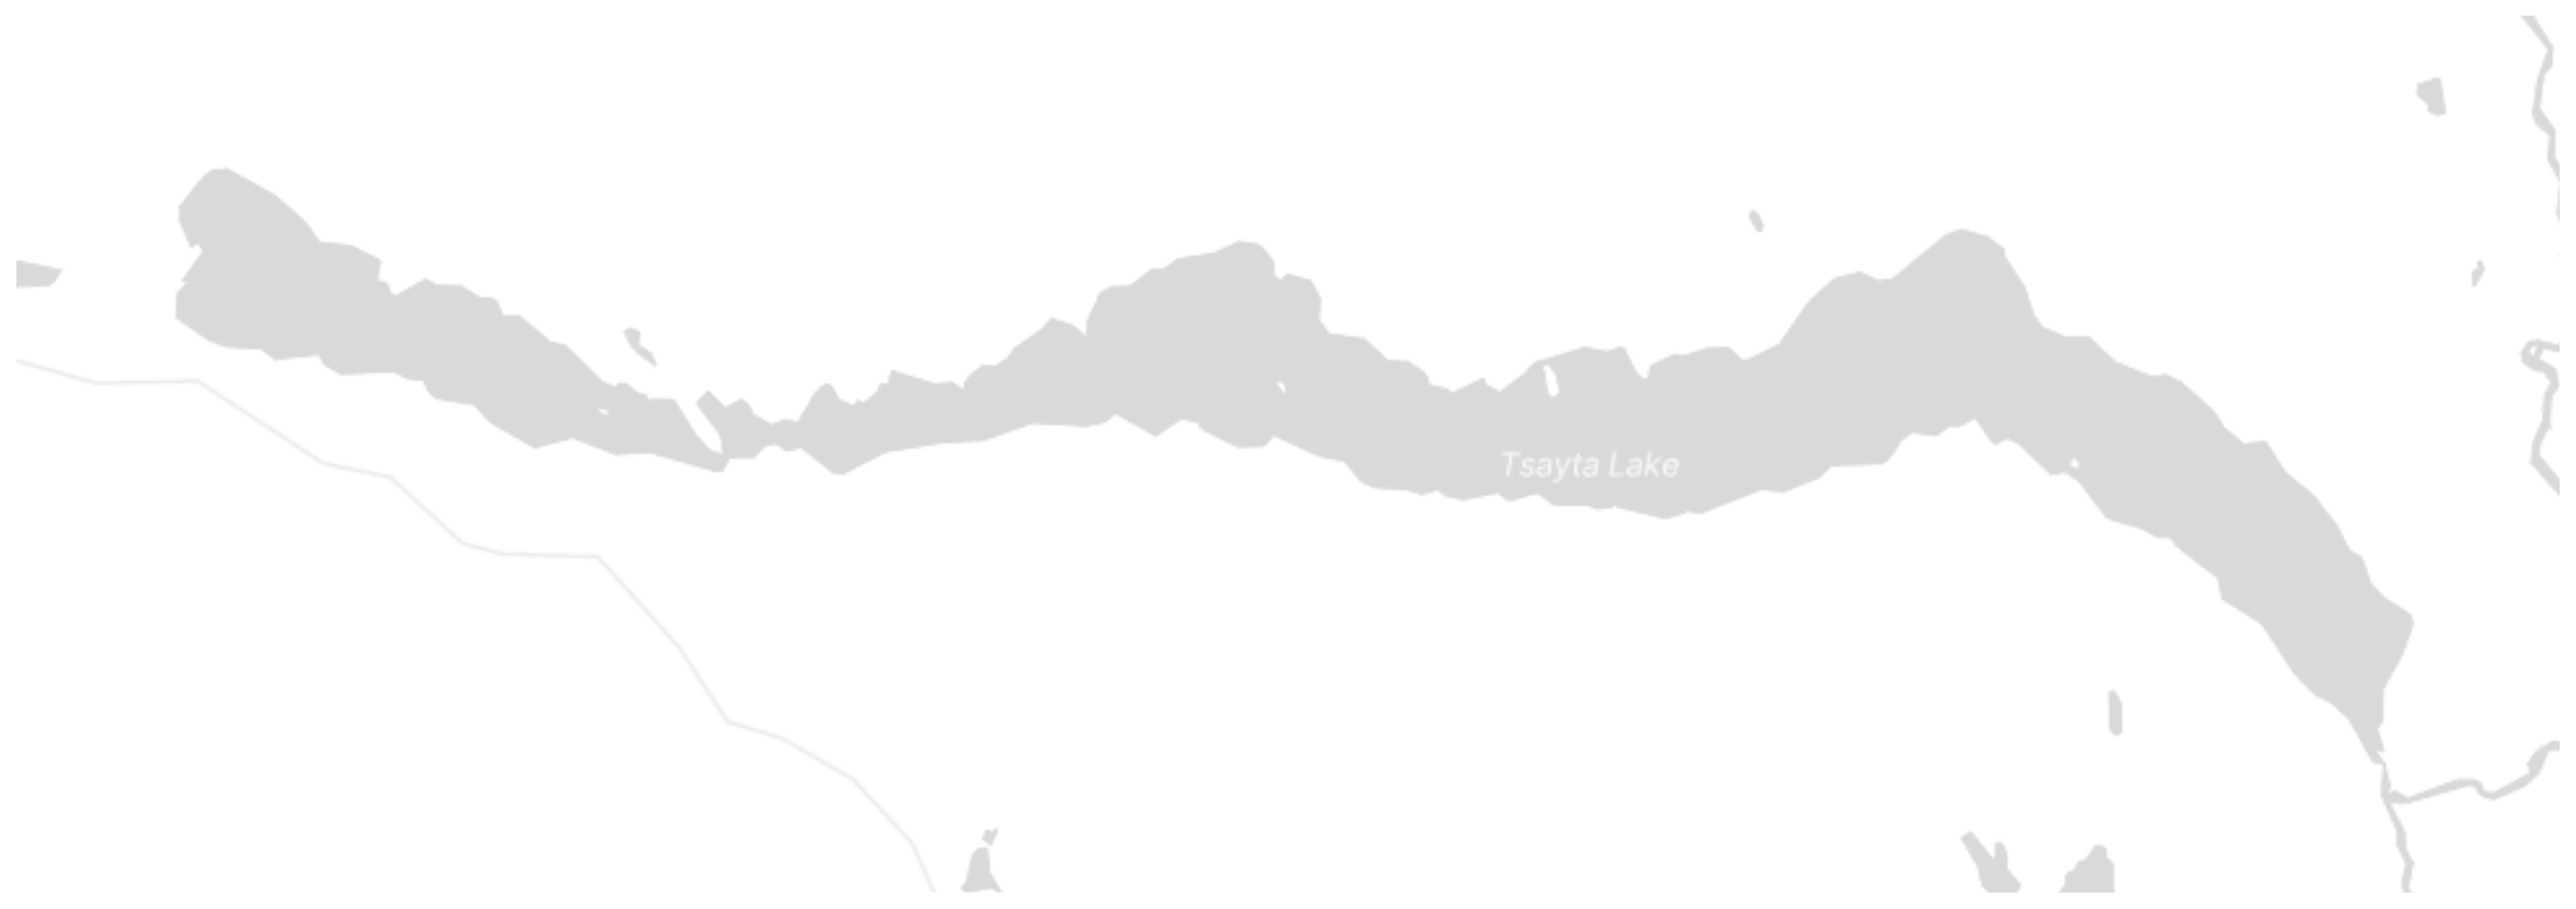

In [172]:
west,east,south,north = place["west"], place["east"], place["south"], place["north"]
zoom_level = cx.tile._calculate_zoom(west,south,east,north)     
print(f"calculated zoom_level={zoom_level}")

# convert to epsg 4326
x_min, y_min = lonlat_to_xy(west, south)
x_max, y_max = lonlat_to_xy(east, north) 
map_bounds = (x_min, x_max, y_min, y_max)
    
# Create blank plot covering the area of place
fig,ax = plt.subplots(1, figsize=(20,20))
fig.set_dpi(200)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
ax.set_axis_off() # don't display axes with coordinates

# Add background tiles
cx.add_basemap(ax, 
               source="https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=87e81a5a-4136-409e-92dd-10c6a1a3cb9d",
               zoom=zoom_level);

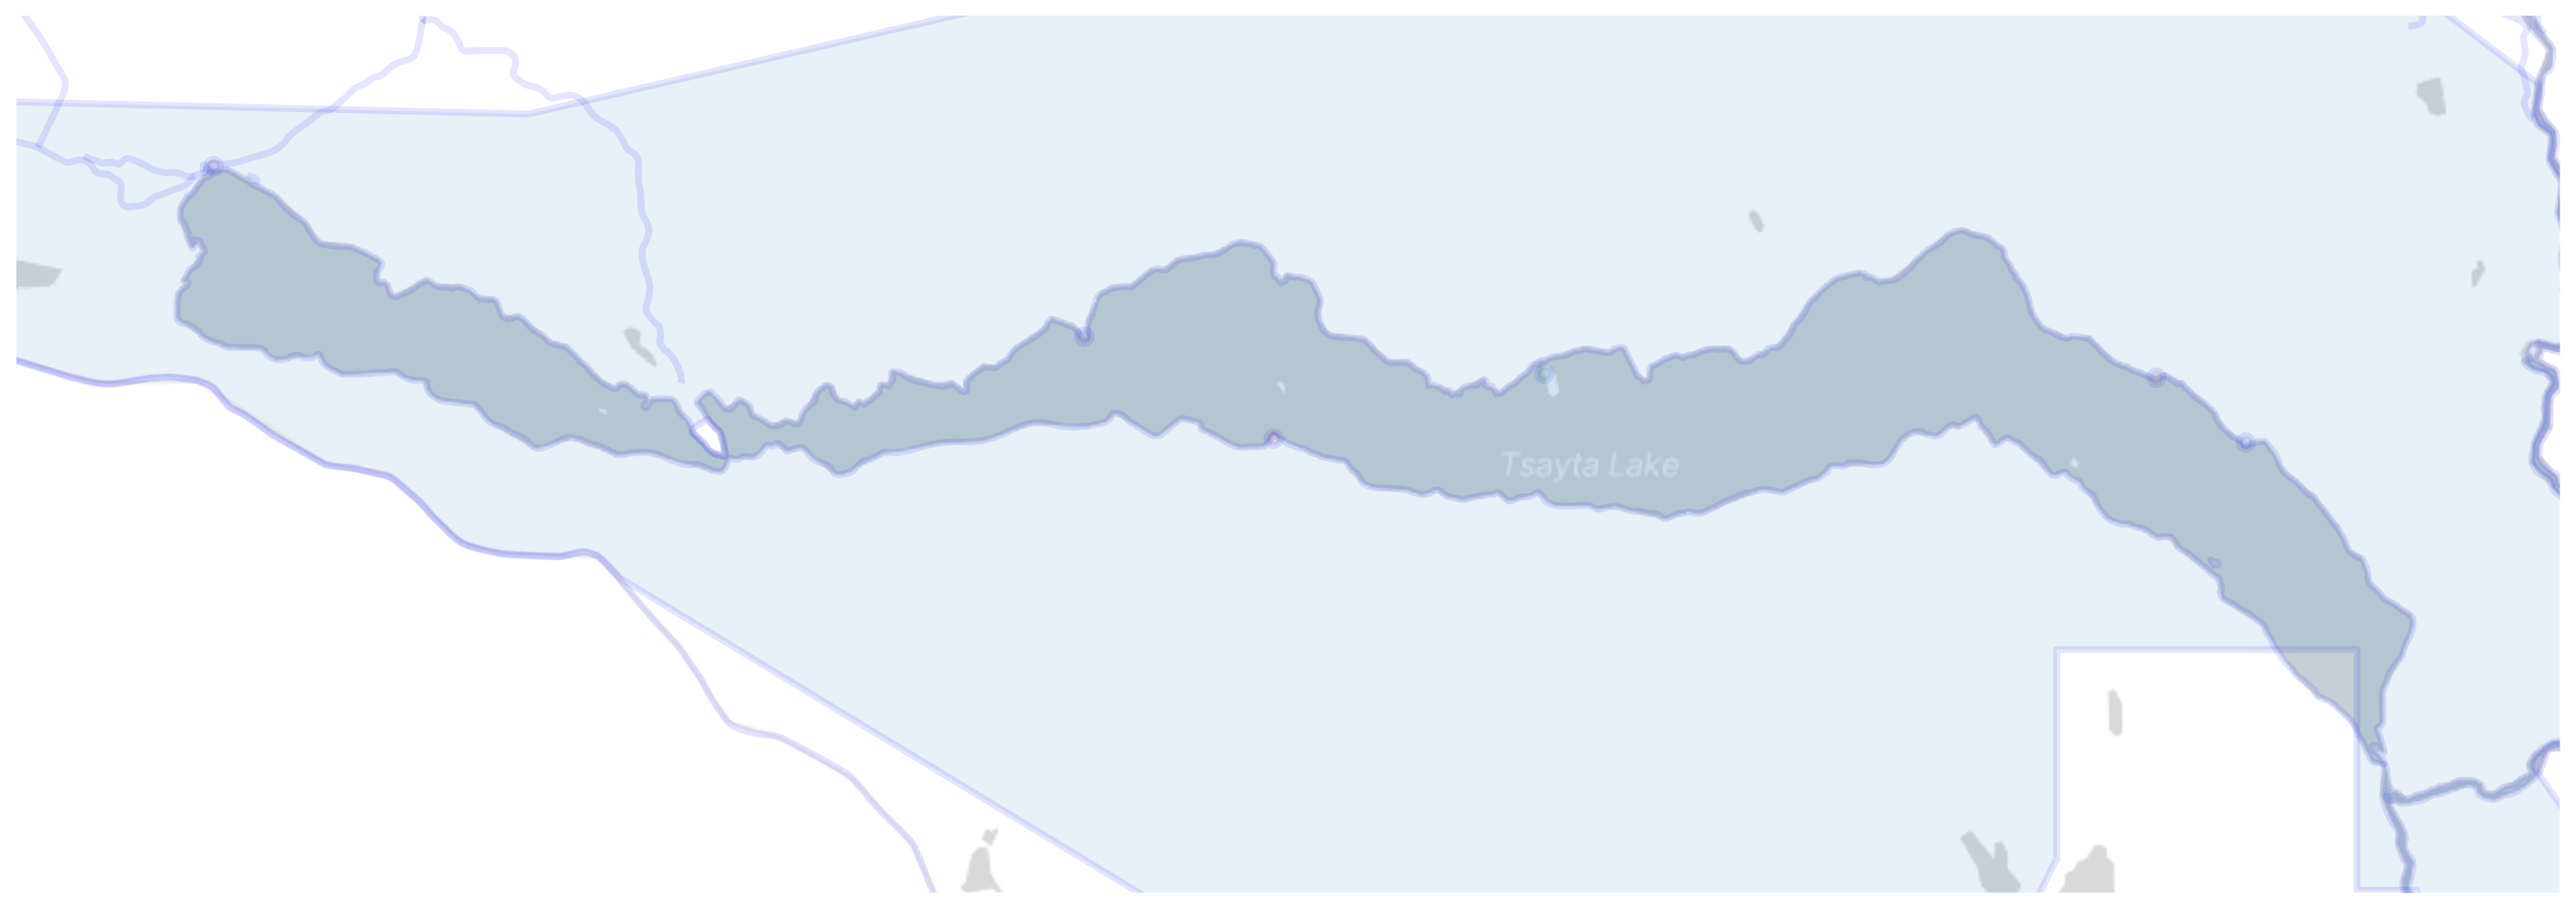

<Figure size 640x480 with 0 Axes>

In [173]:
# Add geometries
for row in gdf.iterrows():
    element_type, osm_id = row[0]
    items = row[1]
    
    gpd.GeoSeries(gdf.loc[element_type, osm_id].geometry).plot(ax=ax, 
                                                               # facecolor="blue", 
                                                               edgecolor="blue", 
                                                               alpha =0.1, 
                                                               linewidth=3)
    
    # if element_type=="node":
    #     print("plotting node", osm_id)
    # elif element_type=="way":
    #     print("plotting way", osm_id)
    # if element_type=="relation":
    #     print("plotting relation", osm_id)
fig   

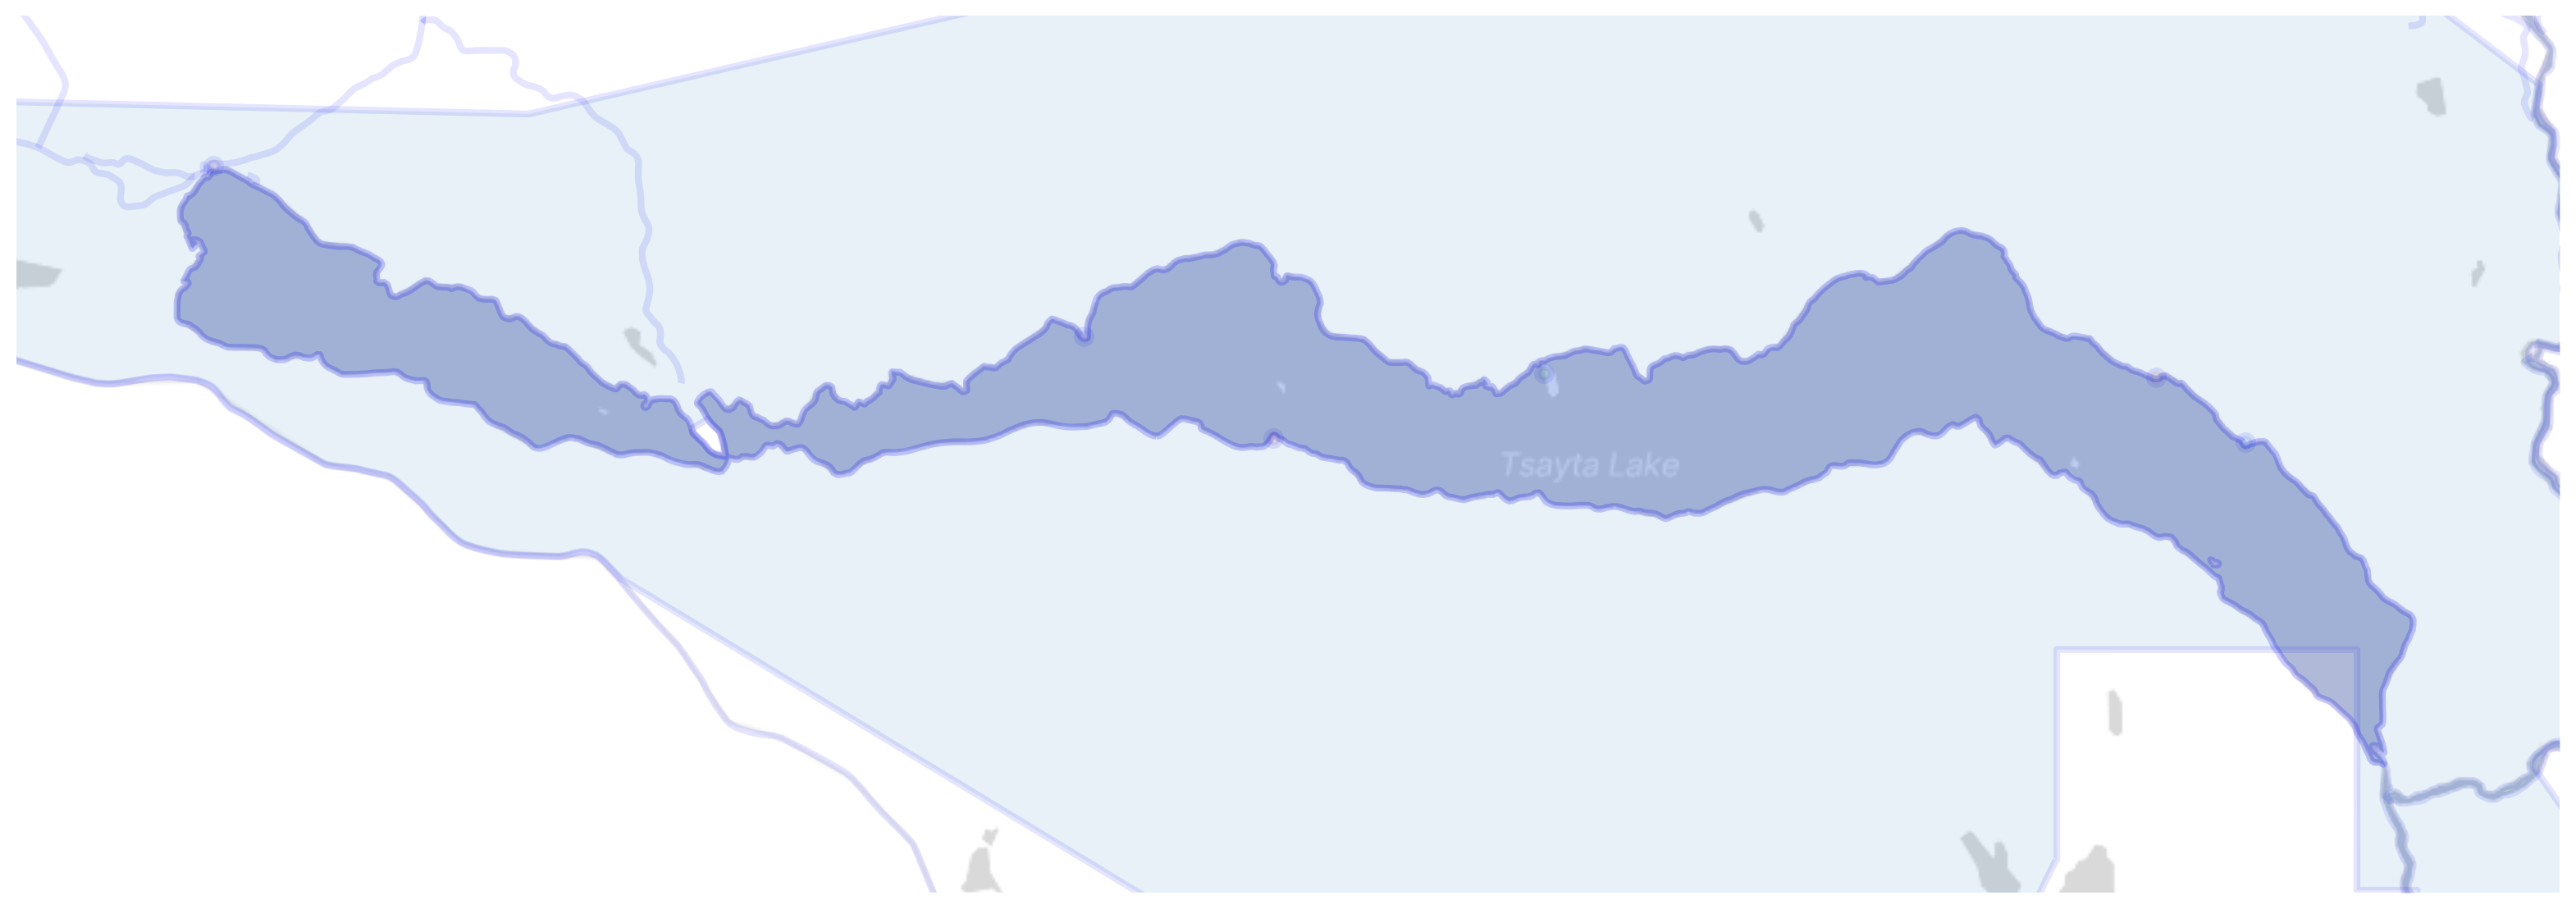

<Figure size 640x480 with 0 Axes>

In [174]:
gpd.GeoSeries(gdf.loc[element_type, osm_id].geometry).plot(ax=ax, facecolor="blue", edgecolor="blue", alpha =0.1, linewidth=3)
fig

In [176]:
fig.savefig("tsaytafig.png")

In [139]:
import shapely.plotting
shapely.plotting.plot_polygon(polygon1)

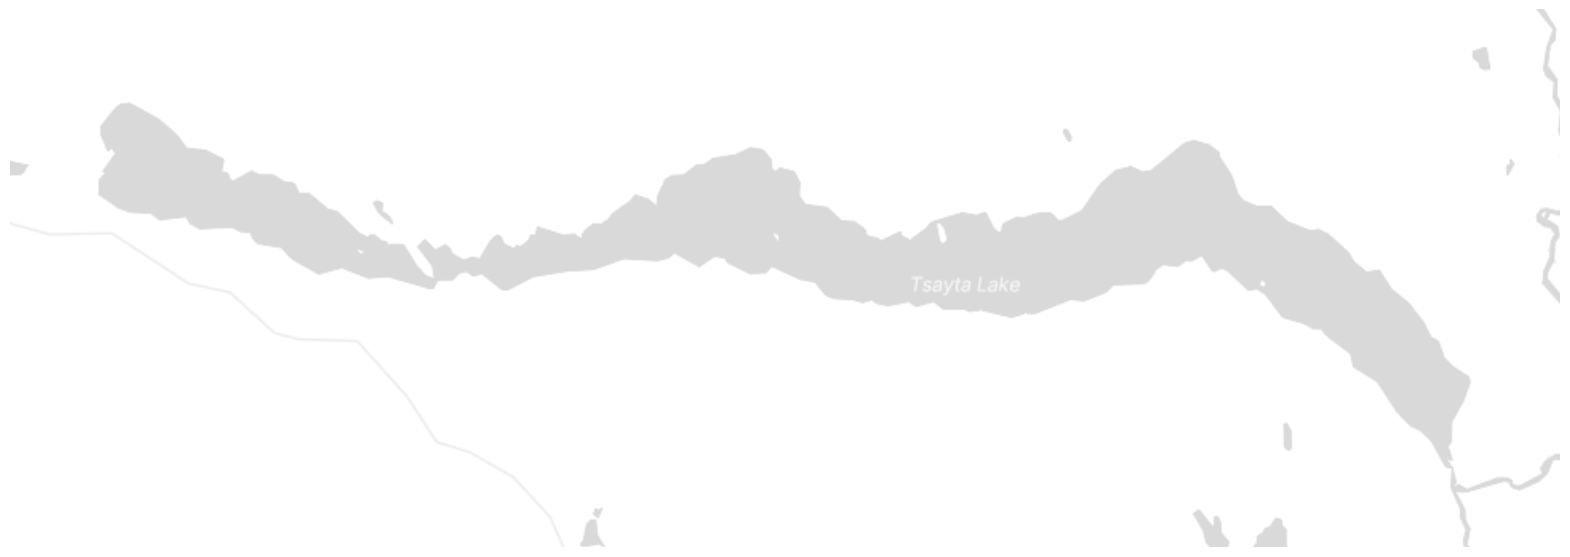

In [115]:
fig

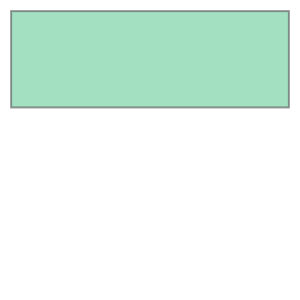

In [82]:
map_bounds # w,e,s,n

map_polygon = Polygon(((map_bounds[0],map_bounds[2]),
                       (map_bounds[0],map_bounds[3]),
                       (map_bounds[1],map_bounds[3]),
                       (map_bounds[1],map_bounds[2])))
map_polygon

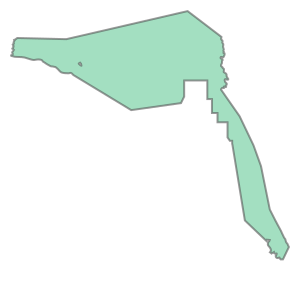

In [95]:
# edit relation (multipolygon) to remove anythin outside map_polygon
multipolygon = gdf.loc["relation",2226155].geometry
sequence = []
for polygon in multipolygon.geoms:
    if map_polygon.intersects(polygon) == True:
        sequence.append(polygon)
new_multipolygon = MultiPolygon(sequence)
gdf.loc["relation",2226155].geometry = new_multipolygon

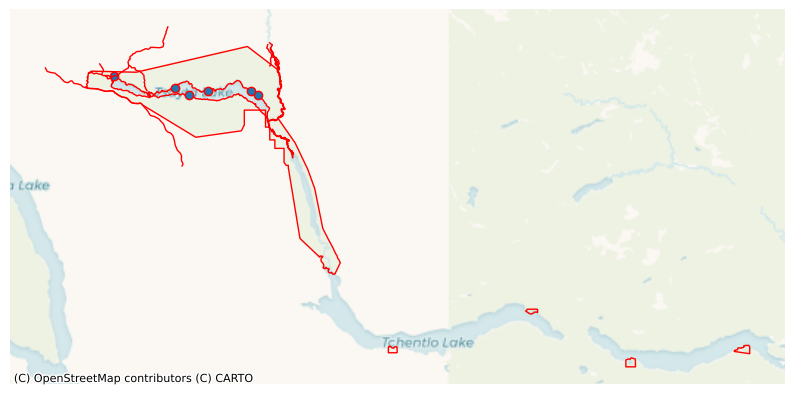

In [96]:
ax = gdf.plot(facecolor="none", edgecolor="red", linewidth=1, figsize = (10,6))
ax.set_axis_off() # don't display axes with coordinates
cx.add_basemap(ax,
               crs=gdf.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
              )

In [112]:
for row in gdf.iterrows():
    print(row[0])#.element_type)

('node', 7578861524)
('node', 7578861525)
('node', 7578861526)
('node', 7578861527)
('node', 7578861528)
('node', 7578861549)
('way', 486287333)
('way', 486471897)
('way', 486471908)
('way', 486505160)
('way', 486505161)
('way', 486505163)
('way', 486505166)
('way', 486505167)
('way', 487589276)
('way', 487788762)
('way', 487788764)
('way', 487788768)
('way', 508463871)
('way', 508463874)
('way', 508463885)
('way', 1178484418)
('way', 1178485525)
('relation', 2226155)
('relation', 7403180)


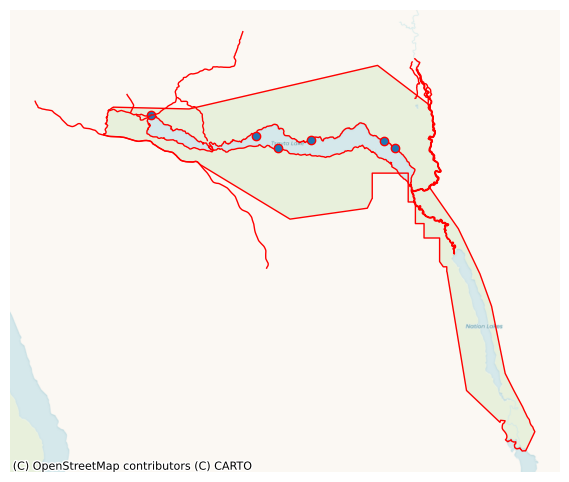

In [101]:
# edit relation (multipolygon) to remove anythin outside map_polygon
multipolygon = gdf.loc["relation",2226155].geometry
sequence = []
for polygon in multipolygon.geoms:
    if map_polygon.intersects(polygon) == True:
        sequence.append(polygon)
new_multipolygon = MultiPolygon(sequence)
gdf.loc[("relation",2226155),"geometry"] = new_multipolygon


ax = gdf.plot(facecolor="none", edgecolor="red", linewidth=1, figsize = (10,6))
ax.set_axis_off() # don't display axes with coordinates
cx.add_basemap(ax,
               crs=gdf.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
              )

In [180]:
import pygmt

# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=[west,east,south,north])

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -125.65 to -125.666666667
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -125.315344971 to -125.25
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 55.417494501 to 55.4166666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 55.48292 to 55.5


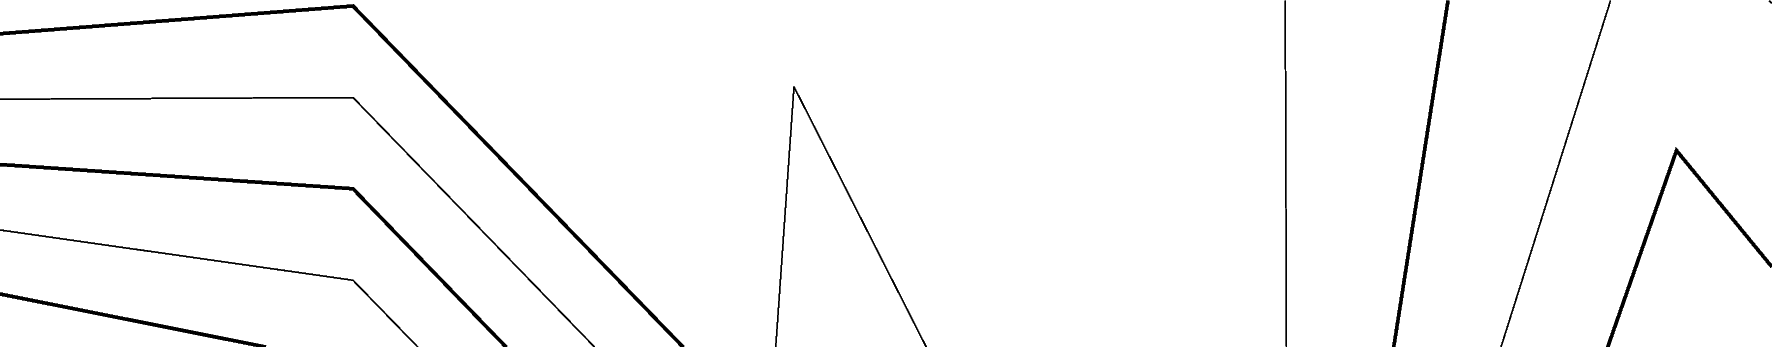

In [181]:
fig = pygmt.Figure()
fig.grdcontour(grid=grid)
fig.show()